<a href="https://colab.research.google.com/github/salinator-hub/Dspy-/blob/main/Extended_OnboardingTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Serve the model using vLLM

In [ ]:
!pip install dspy-ai vllm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/152.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 kB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.4/520.4 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [22]:
# Run server in foreground
# !python -m vllm.entrypoints.openai.api_server --model TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ --quantization awq

# Run server in the background
!nohup python -m vllm.entrypoints.openai.api_server --model TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ --quantization awq > server.log 2>&1 &
# stdout is redirected to a file `server.log` using `> server.log`.
# We use a quantized model prepared using AWQ quantization

In [28]:
# Run this cell again and again to monitor the status of the server.
# The server can take a few mintues to start.
# Once the server has started, you will see logs such as this:
# INFO 02-10 07:16:43 llm_engine.py:877] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 0.0 tokens/s, Running: 0 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 0.0%, CPU KV cache usage: 0.0%
!tail server.log

INFO 02-16 13:09:35 api_server.py:209] args: Namespace(host=None, port=8000, allow_credentials=False, allowed_origins=['*'], allowed_methods=['*'], allowed_headers=['*'], api_key=None, served_model_name=None, chat_template=None, response_role='assistant', ssl_keyfile=None, ssl_certfile=None, root_path=None, middleware=[], model='TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ', tokenizer=None, revision=None, tokenizer_revision=None, tokenizer_mode='auto', trust_remote_code=False, download_dir=None, load_format='auto', dtype='auto', kv_cache_dtype='auto', max_model_len=None, worker_use_ray=False, pipeline_parallel_size=1, tensor_parallel_size=1, max_parallel_loading_workers=None, block_size=16, seed=0, swap_space=4, gpu_memory_utilization=0.9, max_num_batched_tokens=None, max_num_seqs=256, max_paddings=256, disable_log_stats=False, quantization='awq', enforce_eager=False, max_context_len_to_capture=8192, disable_custom_all_reduce=False, enable_lora=False, max_loras=1, max_lora_rank=16, lo

In [37]:
# Once the server is up and running, this should work
!curl http://localhost:8000/v1/models

{"object":"list","data":[{"id":"TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ","object":"model","created":1708089023,"owned_by":"vllm","root":"TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ","parent":null,"permission":[{"id":"modelperm-63a13a7078f94726b4affa9e03dd3116","object":"model_permission","created":1708089023,"allow_create_engine":false,"allow_sampling":true,"allow_logprobs":true,"allow_search_indices":false,"allow_view":true,"allow_fine_tuning":false,"organization":"*","group":null,"is_blocking":false}]}]}

# DSPy: 𝗗eclarative 𝗦elf-improving Language 𝗣rograms

In [ ]:
import dspy
from dspy.evaluate import Evaluate
from dspy.teleprompt import BayesianSignatureOptimizer, BootstrapFewShot, BootstrapFewShotWithRandomSearch, BootstrapFinetune


In [ ]:
lm = dspy.HFClientVLLM(model="TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ", port=8000, url="http://localhost")

dspy.settings.configure(lm=lm)

colbertv2 = dspy.ColBERTv2(url='http://20.102.90.50:2017/wiki17_abstracts')

# # NOTE: After you finish this notebook, you can use GPT-3.5 like this if you like.
# turbo = dspy.OpenAI(model='gpt-3.5-turbo-instruct')
# # In that case, make sure to configure lm=turbo below if you choose to do that.

dspy.settings.configure(rm=colbertv2)

In [ ]:
predict = dspy.Predict('question -> answer')

predict(question="What is the capital of  ancient India?")

In [57]:
%%writefile Emotion.py

#ALL THE IMPORTS
import matplotlib.pyplot as plt
import numpy as np
import dspy
from dspy.evaluate import Evaluate
from dspy.teleprompt import BootstrapFewShot, BootstrapFewShotWithRandomSearch, BootstrapFinetune
from dspy.teleprompt import KNNFewShot
from dspy.predict.knn import KNN
import argparse
from dspy.teleprompt import BayesianSignatureOptimizer

#MODEL
model_name="TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ"
lm = dspy.HFClientVLLM(model=model_name, port=8000, url="http://localhost")
dspy.settings.configure(lm=lm)

# Training dataset
train = [("I feel so sad when I think about the loss of my beloved pet.", "Sadness"),
         ("This achievement brings me immense joy and satisfaction.", "Joy"),
         ("I'm deeply in love with the beautiful scenery of this place.", "Love"),
         ("His rude behavior towards me makes me feel anger rising inside.", "Anger"),
         ("The thought of failing this exam fills me with fear and anxiety.", "Fear"),
         ("What a pleasant surprise to receive unexpected gifts from friends!", "Surprise"),
         ("Watching this heartwarming movie always brings tears to my eyes.", "Sadness"),
         ("The success of our project fills me with pride and happiness.", "Joy"),
         ("Being surrounded by loved ones fills my heart with warmth and love.", "Love"),
         ("Her disrespectful attitude towards others fills me with anger.", "Anger")]

# Development dataset
devset = [("The news of his passing brought overwhelming sadness to everyone.", "Sadness"),
       ("The unexpected visit from my old friend filled me with joy.", "Joy"),
       ("Expressing your love openly and honestly is the key to a happy relationship.", "Love"),
       ("His constant complaints and negativity make me feel annoyance and anger.", "Anger"),
       ("Walking alone in the dark alley sends shivers of fear down my spine.", "Fear"),
       ("Finding a handwritten letter from my childhood friend was a delightful surprise.", "Surprise"),
       ("Seeing abandoned animals on the street always fills me with sadness.", "Sadness"),
       ("The breathtaking view from the mountaintop filled me with awe and wonder.", "Joy"),
       ("The bond between a mother and her child is pure and unconditional love.", "Love"),
       ("His sarcastic remarks during the meeting filled me with frustration.", "Anger")]

# Convert the dataset into DSPy Examples
train = [dspy.Example(sentence=sentence, sentiment=sentiment).with_inputs('sentence') for sentence, sentiment in train]
devset = [dspy.Example(sentence=sentence, sentiment=sentiment).with_inputs('sentence') for sentence, sentiment in devset]

# Print the lengths of trainset and devset
#print(len(train), len(devset))

# Access an example from trainset and devset
train_example = train[0]
dev_example = devset[0]
# print(train_example.sentence)



def should_be_correct(sen, set):
  check=dspy.Predict("sentence -> sentiment")
  result=check(sentence=f"Is this {set}; a correct sentiment for {sen}. Return 0 for False and 1 for True.")
  if result.sentiment==0:
    return False
  else:
    return True

class Emotion(dspy.Signature):
    """Classify emotion among sadness, joy, love, anger, fear, surprise."""

    sentence = dspy.InputField(desc = "Input sentence")
    sentiment = dspy.OutputField(desc = "Predicted Emotion in word")


class EmotionPipelineAssertions(dspy.Module):
    def __init__(self, assert_on=True):
        super().__init__()
        self.assert_on = assert_on
        self.Emotion_predicted = dspy.ChainOfThought(Emotion)

    def forward(self, sentence, **kwargs):
        predicted_Sentiment = self.Emotion_predicted(sentence=sentence)

        if self.assert_on:
            dspy.Suggest(
                should_be_correct(sentence, predicted_Sentiment),
                "Emotion is correct.",
                target_module=Emotion
            )

        return predicted_Sentiment


class Assess(dspy.Signature):
    """Assess the quality of the solution along the specified dimension."""

    assessed_text = dspy.InputField()
    assessment_sentence = dspy.InputField()
    assessment_sentiment = dspy.OutputField(desc="Only True or False")


def metric(gold, pred, trace=None):
    sentence, sentiment, emos = gold.sentence, gold.sentiment, pred.sentiment

    correctness = f"The given emos{emos} will be effective for this sentence {sentence}. The gold sentiment is {sentiment}"
    informative = f"For this sentence {sentence} is the given {emos} informative. The gold sentiment is {sentiment}"

    correct = dspy.ChainOfThought(Assess)(assessed_text=sentence, assessment_sentence=correctness)
    informative = dspy.ChainOfThought(Assess)(assessed_text=sentence, assessment_sentence=informative)

    correctness_score = correct.assessment_sentiment
    info_score = informative.assessment_sentiment
    score = 0

    if correctness_score == "True":
        score += 1

    if info_score == "True":
        score += 1

    return score / 2.0


# Define your devset and kwargs here
# Replace placeholders with your actual development dataset and any additional keyword arguments you need for evaluation

kwargs = dict(display_progress=True, display_table=5)

# Set up the `evaluate_on_hotpotqa` function. We'll use this many times below.
evaluate_on_hotpotqa = Evaluate( devset = devset, num_threads=1, display_progress=True, display_table=5)

# Define function to evaluate pipeline
def evaluate_pipeline(model_name, assertion=True, bayesian=True):
    Emotion_predicted = EmotionPipelineAssertions()

    # Compile the pipeline with specified configurations
    if assertion and bayesian:
        compiled_pipeline = BayesianSignatureOptimizer(metric=metric, n=5, init_temperature=1.0).compile(Emotion_predicted, devset=devset, optuna_trials_num=5, max_bootstrapped_demos=3, max_labeled_demos=5, eval_kwargs=kwargs)
        config_label = "Optimized Pipeline"
    elif assertion and not bayesian:
        compiled_pipeline = Emotion_predicted
        config_label = "Without Bayesian"
    elif not assertion and bayesian:
        without_assertion=EmotionPipelineAssertions(assert_on=False)
        compiled_pipeline = BayesianSignatureOptimizer(metric=metric, n=5, init_temperature=1.0).compile(without_assertion, devset=devset, optuna_trials_num=5, max_bootstrapped_demos=3, max_labeled_demos=5, eval_kwargs=kwargs)
        config_label = "Without Assertion"
    else:
        without_assertion_and_bayesian=EmotionPipelineAssertions(assert_on=False)
        compiled_pipeline = without_assertion_and_bayesian
        config_label = "No Assertion and No Bayesian"

    # Evaluate the compiled pipeline
    eval_score = evaluate_on_hotpotqa(compiled_pipeline, metric=metric)
    return eval_score, config_label


# Run the evaluation for each configuration
def run_ablation_study(model_name, disable_assertion=False, disable_bayesian=False):
    scores = []
    config_labels = []

    for assertion in [True, False]:
        if disable_assertion and not assertion:
            continue
        for bayesian in [True, False]:
            if disable_bayesian and not bayesian:
                continue
            eval_score, config_label = evaluate_pipeline(model_name, assertion=assertion, bayesian=bayesian)
            scores.append(eval_score)
            config_labels.append(config_label)

    return scores, config_labels

def use_pipeline_as_user(model_name, sentence):
    Emotion_predicted = EmotionPipelineAssertions()
    result = Emotion_predicted(sentence=sentence)
    print("Predicted Emotion:", result.sentiment)

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Pipeline for suggesting home remedies.")
    parser.add_argument("--assertion", type=bool, default=True, help="Whether to include assertion in the pipeline. Default: True")
    parser.add_argument("--bayesian", type=bool, default=True, help="Whether to use Bayesian optimization. Default: True")
    parser.add_argument("--run-ablation", action="store_true", help="Perform an ablation study.")
    parser.add_argument("--model-name", type=str, default="TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ", help="Name of the language model. Default: TheBloke/dolphin-2.6-mistral-7B-dpo-laser-AWQ")
    parser.add_argument("--user-sentence", type=str, help="sentence to use the pipeline as a user.")
    parser.add_argument("--disable-assertion", action="store_true", help="Disable assertion in the pipeline during ablation study.")
    parser.add_argument("--disable-bayesian", action="store_true", help="Disable Bayesian optimization in the pipeline during ablation study.")
    args = parser.parse_args()

    if args.run_ablation:
        scores, config_labels = run_ablation_study(args.model_name, disable_assertion=args.disable_assertion, disable_bayesian=args.disable_bayesian)
        # Plotting the results
        x = np.arange(len(config_labels))
        plt.bar(x, scores)
        plt.xlabel('Configuration')
        plt.ylabel('Evaluation Score')
        plt.title('Ablation Study Results')
        plt.xticks(x, config_labels, rotation=45)
        plt.tight_layout()
        plt.show()
    elif args.user_sentence:
        use_pipeline_as_user(args.model_name, args.user_sentence)
    else:
        eval_score, config_label = evaluate_pipeline(args.model_name, assertion=args.assertion, bayesian=args.bayesian)
        print(f"Evaluation Score: {eval_score}, Configuration: {config_label}")


Overwriting Emotion.py


In [50]:
!python Emotion.py --run-ablation --disable-assertion

 30% 3/10 [00:40<01:34, 13.53s/it]
Bootstrapped 3 full traces after 4 examples in round 0.
 30% 3/10 [00:42<01:38, 14.13s/it]
Bootstrapped 3 full traces after 4 examples in round 0.
 30% 3/10 [00:39<01:33, 13.32s/it]
Bootstrapped 3 full traces after 4 examples in round 0.
 30% 3/10 [00:42<01:38, 14.04s/it]
Bootstrapped 3 full traces after 4 examples in round 0.
[I 2024-02-16 14:04:59,923] A new study created in memory with name: no-name-03467153-6b0b-4d7e-8cde-83ff2c82e7de
Average Metric: 8.5 / 10  (85.0): 100% 10/10 [02:13<00:00, 13.32s/it]
Average Metric: 8.5 / 10  (85.0%)
/usr/local/lib/python3.10/dist-packages/dspy/evaluate/evaluate.py:142: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to

In [58]:
!python Emotion.py --user-sentence "are you ok"

Predicted Emotion: Sadness

Sentence: I'm so happy to see you!
Reasoning: Let's think step by step in order to understand the sentiment. We can see that the sentence is expressing happiness and excitement to see someone.
Sentiment: Joy

Sentence: I love you so much!
Reasoning: Let's think step by step in order to understand the sentiment. We can see that the sentence is expressing strong affection and love towards someone.
Sentiment: Love

Sentence:


In [61]:

# Training dataset
train = [("I feel so sad when I think about the loss of my beloved pet.", "Sadness"),
         ("This achievement brings me immense joy and satisfaction.", "Joy"),
         ("I'm deeply in love with the beautiful scenery of this place.", "Love"),
         ("His rude behavior towards me makes me feel anger rising inside.", "Anger"),
         ("The thought of failing this exam fills me with fear and anxiety.", "Fear"),
         ("What a pleasant surprise to receive unexpected gifts from friends!", "Surprise"),
         ("Watching this heartwarming movie always brings tears to my eyes.", "Sadness"),
         ("The success of our project fills me with pride and happiness.", "Joy"),
         ("Being surrounded by loved ones fills my heart with warmth and love.", "Love"),
         ("Her disrespectful attitude towards others fills me with anger.", "Anger")]

# Development dataset
devset = [("The news of his passing brought overwhelming sadness to everyone.", "Sadness"),
       ("The unexpected visit from my old friend filled me with joy.", "Joy"),
       ("Expressing your love openly and honestly is the key to a happy relationship.", "Love"),
       ("His constant complaints and negativity make me feel annoyance and anger.", "Anger"),
       ("Walking alone in the dark alley sends shivers of fear down my spine.", "Fear"),
       ("Finding a handwritten letter from my childhood friend was a delightful surprise.", "Surprise"),
       ("Seeing abandoned animals on the street always fills me with sadness.", "Sadness"),
       ("The breathtaking view from the mountaintop filled me with awe and wonder.", "Joy"),
       ("The bond between a mother and her child is pure and unconditional love.", "Love"),
       ("His sarcastic remarks during the meeting filled me with frustration.", "Anger")]

# Convert the dataset into DSPy Examples
train = [dspy.Example(sentence=sentence, sentiment=sentiment).with_inputs('sentence') for sentence, sentiment in train]
devset = [dspy.Example(sentence=sentence, sentiment=sentiment).with_inputs('sentence') for sentence, sentiment in devset]

# Print the lengths of trainset and devset
#print(len(train), len(devset))

# Access an example from trainset and devset
train_example = train[0]
dev_example = devset[0]
# print(train_example.sentence)


In [63]:
from dspy.teleprompt import BayesianSignatureOptimizer
from dspy.evaluate.evaluate import Evaluate


sentiments=["Happy",
            "sadness",
            "Angry",
            "Fear",
            "Joy",
            "Surprise",
            ]


def should_be_correct(sen, set):
  check=dspy.Predict("sentence -> sentiment")
  result=check(sentence=f"Is this {set}; a correct sentiment for {sen}. Return 0 for False and 1 for True.")
  if result.sentiment==0:
    return False
  else:
    return True

class Emotion(dspy.Signature):
    """Classify emotion among sadness, joy, love, anger, fear, surprise."""

    sentence = dspy.InputField(desc = "Input sentence")
    sentiment = dspy.OutputField(desc = "Predicted Emotion in word")


class EmotionPipelineAssertions(dspy.Module):
    def __init__(self, assert_on=True):
        super().__init__()
        self.assert_on = assert_on
        self.Emotion_predicted = dspy.ChainOfThought(Emotion)

    def forward(self, sentence, **kwargs):
        predicted_Sentiment = self.Emotion_predicted(sentence=sentence)

        if self.assert_on:
            dspy.Suggest(
                should_be_correct(sentence, predicted_Sentiment),
                "Emotion is correct.",
                target_module=Emotion
            )

        return predicted_Sentiment


class Assess(dspy.Signature):
    """Assess the quality of the solution along the specified dimension."""

    assessed_text = dspy.InputField()
    assessment_sentence = dspy.InputField()
    assessment_sentiment = dspy.OutputField(desc="Only True or False")


def metric(gold, pred, trace=None):
    sentence, sentiment, emos = gold.sentence, gold.sentiment, pred.sentiment

    correctness = f"The given emos{emos} will be effective for this sentence {sentence}. The gold sentiment is {sentiment}"
    informative = f"For this sentence {sentence} is the given {emos} informative. The gold sentiment is {sentiment}"

    correct = dspy.ChainOfThought(Assess)(assessed_text=sentence, assessment_sentence=correctness)
    informative = dspy.ChainOfThought(Assess)(assessed_text=sentence, assessment_sentence=informative)

    correctness_score = correct.assessment_sentiment
    info_score = informative.assessment_sentiment
    score = 0

    if correctness_score == "True":
        score += 1

    if info_score == "True":
        score += 1

    return score / 2.0


Emotion=EmotionPipelineAssertions()
teleprompter = BayesianSignatureOptimizer( metric=metric, n=5, init_temperature=1.0)
kwargs = dict( display_progress=True, display_table=0)
compiled_prompt_opt = teleprompter.compile(Emotion, devset = devset, optuna_trials_num=5, max_bootstrapped_demos=3, max_labeled_demos=5, eval_kwargs=kwargs)



# Set up the `evaluate_on_hotpotqa` function. We'll use this many times below.
evaluate_on_hotpotqa = Evaluate(devset=devset, num_threads=1, display_progress=True, display_table=5)

evaluate_on_hotpotqa(Emotion, metric=metric) #normal
evaluate_on_hotpotqa(compiled_prompt_opt, metric=metric) #after optimizer

 30%|███       | 3/10 [00:00<00:00, 163.26it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:00<00:00, 146.68it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:00<00:00, 106.83it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:00<00:00, 150.46it/s]
[I 2024-02-16 14:59:58,246] A new study created in memory with name: no-name-ef1cdcb0-7a7e-4421-94d0-f504b0b8b02e


Bootstrapped 3 full traces after 4 examples in round 0.


Average Metric: 8.5 / 10  (85.0): 100%|██████████| 10/10 [00:00<00:00, 116.92it/s]
/usr/local/lib/python3.10/dist-packages/dspy/evaluate/evaluate.py:142: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)
[I 2024-02-16 14:59:58,346] Trial 0 finished with value: 85.0 and parameters: {'139650319037248_predictor_instruction': 1, '139650319037248_predictor_demos': 4}. Best is trial 0 with value: 85.0.


Average Metric: 8.5 / 10  (85.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Anger --- Sentence: The unexpected compliment from my boss made me feel happy and joyful. Reasoning: Let's think step by step in order to ${produce the sentiment}. We ... - Recall the unexpected compliment - Feel the happiness and joy of being appreciated - Understand that the situation is a positive one Given: "The text in consideration is: ... Emotion: ... Joy --- Sentence: The informative. The gold sentiment is Anger

Reasoning: 

Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 118.65it/s]
[I 2024-02-16 14:59:58,444] Trial 1 finished with value: 100.0 and parameters: {'139650319037248_predictor_instruction': 3, '139650319037248_predictor_demos': 2}. Best is trial 1 with value: 100.0.


Average Metric: 10.0 / 10  (100.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Anger --- Sentence: The thought of spending the rest of my life with him fills me with love and happiness. Consider the range of human emotions – sadness, joy informative. The gold sentiment is Anger

Reasoning: Let's think step by step in order to assess the quality of the solution along the specified dimension. The dimension here is the emotion expressed in the sentence. The sentence "His sarcastic remarks during the meeting fil

Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 129.47it/s]
[I 2024-02-16 14:59:58,537] Trial 2 finished with value: 100.0 and parameters: {'139650319037248_predictor_instruction': 0, '139650319037248_predictor_demos': 0}. Best is trial 1 with value: 100.0.


Average Metric: 10.0 / 10  (100.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Anger informative. The gold sentiment is Anger

Reasoning: Let's think step by step in order to assess the quality of the solution along the specified dimension. The sentence is about someone's sarcastic remarks during a meeting, and it is clear that the speaker is expressing frustration. The gold sentiment is Anger, and the sentence does convey this emotion. Therefore, the assessment is that the sentence is informative about the 

Average Metric: 8.0 / 10  (80.0): 100%|██████████| 10/10 [00:00<00:00, 128.18it/s]
[I 2024-02-16 14:59:58,627] Trial 3 finished with value: 80.0 and parameters: {'139650319037248_predictor_instruction': 0, '139650319037248_predictor_demos': 4}. Best is trial 1 with value: 100.0.


Average Metric: 8.0 / 10  (80.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Anger --- Sentence: The unexpected compliment from my boss made me feel happy and joyful. Sentiment: Joy --- Sentence: The thought of losing my job makes me feel fear and anxiety. Sentiment: Fear --- Sentence: The bond between a mother and her child is pure and unconditional love. Sentiment: Love --- Sentence: The unexpected compliment from my boss made me feel happy and joyful. Sent informative. The gold sentiment is Anger

Reasoni

Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 128.72it/s]
[I 2024-02-16 14:59:58,717] Trial 4 finished with value: 100.0 and parameters: {'139650319037248_predictor_instruction': 3, '139650319037248_predictor_demos': 3}. Best is trial 1 with value: 100.0.


Average Metric: 10.0 / 10  (100.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Frustration --- Sentence: The thought informative. The gold sentiment is Anger

Reasoning: Let's think step by step in order to assess the quality of the solution along the specified dimension. The dimension here is the emotion expressed in the sentence. The sentence "His sarcastic remarks during the meeting filled me with frustration." clearly expresses the emotion of frustration. Therefore, the gold sentiment is indeed Anger. Ho

Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 136.84it/s]


Average Metric: 10.0 / 10  (100.0%)


,sentence,example_sentiment,rationale,pred_sentiment,metric
0,The news of his passing brought overwhelming sadness to everyone.,Sadness,understand the sentiment. We see that the news of his passing is causing sadness to everyone.,Sadness,1.0
1,The unexpected visit from my old friend filled me with joy.,Joy,feel the sentiment. We ...,Joy,1.0
2,Expressing your love openly and honestly is the key to a happy relationship.,Love,"express the sentiment. We see that the sentence talks about expressing love openly and honestly, which is a positive action.",Love,1.0
3,His constant complaints and negativity make me feel annoyance and anger.,Anger,"feel annoyance and anger. We observe that he is constantly complaining and being negative, which can be frustrating and irritating.",Anger,1.0
4,Walking alone in the dark alley sends shivers of fear down my spine.,Fear,"produce the sentiment. We see that the person is walking alone in a dark alley, which is a situation that can be perceived as dangerous...",Fear,1.0


Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 116.76it/s]

Average Metric: 10.0 / 10  (100.0%)



/usr/local/lib/python3.10/dist-packages/dspy/evaluate/evaluate.py:142: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,sentence,example_sentiment,rationale,pred_sentiment,metric
0,The news of his passing brought overwhelming sadness to everyone.,Sadness,${produce the sentiment}. We can see that the news of his passing has caused a deep sense of sadness and grief.,Sadness --- Sentence: The thought of losing my job makes me feel anxious and worried. Reasoning: Let's think step by step in order to ${produce...,1.0
1,The unexpected visit from my old friend filled me with joy.,Joy,${produce the sentiment}. We can see that the person is experiencing joy due to the unexpected visit from their old friend.,Joy --- Sentence: The thought of spending the rest of my life with him fills me with love and happiness. Consider the range of human...,1.0
2,Expressing your love openly and honestly is the key to a happy relationship.,Love,${produce the sentiment}. We can see that the person is expressing the importance of love and happiness in a relationship.,Joy --- Sentence: The thought of losing my job makes me feel anxious and worried. Sentiment: Fear --- Sentence: The way he looks at me...,1.0
3,His constant complaints and negativity make me feel annoyance and anger.,Anger,${produce the sentiment}. We can see that the person is experiencing annoyance and anger due to the constant complaints and negativity.,"Anger --- Sentence: The thought of losing my job makes me feel anxious and worried. Consider the range of human emotions – sadness, joy, love,...",1.0
4,Walking alone in the dark alley sends shivers of fear down my spine.,Fear,${produce the sentiment}. We can see that the person is experiencing fear due to the dark alley.,"Fear --- Sentence: The thought of losing my job makes me feel anxious and worried. Consider the range of human emotions – sadness, joy, love,...",1.0


100.0

In [64]:
def should_be_correct(sen, set):
  check=dspy.Predict("sentence -> sentiment")
  result=check(sentence=f"Is this {set}; a correct sentiment for {sen}. Return 0 for False and 1 for True.")
  if result.sentiment==0:
    return False
  else:
    return True


should_be_correct("I am feeling low", "sadness")

True

 30%|███       | 3/10 [00:00<00:00, 135.37it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:00<00:00, 155.57it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:00<00:00, 156.05it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:00<00:00, 162.75it/s]
[I 2024-02-16 15:19:47,922] A new study created in memory with name: no-name-2157276b-4417-416d-8fdd-a0a9aa9b8e4f


Bootstrapped 3 full traces after 4 examples in round 0.


Average Metric: 8.5 / 10  (85.0): 100%|██████████| 10/10 [00:00<00:00, 134.75it/s]
[I 2024-02-16 15:19:48,009] Trial 0 finished with value: 85.0 and parameters: {'139650056314768_predictor_instruction': 1, '139650056314768_predictor_demos': 4}. Best is trial 0 with value: 85.0.


Average Metric: 8.5 / 10  (85.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Anger --- Sentence: The unexpected compliment from my boss made me feel happy and joyful. Reasoning: Let's think step by step in order to ${produce the sentiment}. We ... - Recall the unexpected compliment - Feel the happiness and joy of being appreciated - Understand that the situation is a positive one Given: "The text in consideration is: ... Emotion: ... Joy --- Sentence: The informative. The gold sentiment is Anger

Reasoning: 

Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 118.96it/s]
[I 2024-02-16 15:19:48,107] Trial 1 finished with value: 100.0 and parameters: {'139650056314768_predictor_instruction': 3, '139650056314768_predictor_demos': 2}. Best is trial 1 with value: 100.0.


Average Metric: 10.0 / 10  (100.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Anger --- Sentence: The thought of spending the rest of my life with him fills me with love and happiness. Consider the range of human emotions – sadness, joy informative. The gold sentiment is Anger

Reasoning: Let's think step by step in order to assess the quality of the solution along the specified dimension. The dimension here is the emotion expressed in the sentence. The sentence "His sarcastic remarks during the meeting fil

Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 116.31it/s]
[I 2024-02-16 15:19:48,205] Trial 2 finished with value: 100.0 and parameters: {'139650056314768_predictor_instruction': 0, '139650056314768_predictor_demos': 0}. Best is trial 1 with value: 100.0.


Average Metric: 10.0 / 10  (100.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Anger informative. The gold sentiment is Anger

Reasoning: Let's think step by step in order to assess the quality of the solution along the specified dimension. The sentence is about someone's sarcastic remarks during a meeting, and it is clear that the speaker is expressing frustration. The gold sentiment is Anger, and the sentence does convey this emotion. Therefore, the assessment is that the sentence is informative about the 

Average Metric: 8.0 / 10  (80.0): 100%|██████████| 10/10 [00:00<00:00, 131.47it/s]
[I 2024-02-16 15:19:48,296] Trial 3 finished with value: 80.0 and parameters: {'139650056314768_predictor_instruction': 0, '139650056314768_predictor_demos': 4}. Best is trial 1 with value: 100.0.


Average Metric: 8.0 / 10  (80.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Anger --- Sentence: The unexpected compliment from my boss made me feel happy and joyful. Sentiment: Joy --- Sentence: The thought of losing my job makes me feel fear and anxiety. Sentiment: Fear --- Sentence: The bond between a mother and her child is pure and unconditional love. Sentiment: Love --- Sentence: The unexpected compliment from my boss made me feel happy and joyful. Sent informative. The gold sentiment is Anger

Reasoni

Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 112.84it/s]
[I 2024-02-16 15:19:48,399] Trial 4 finished with value: 100.0 and parameters: {'139650056314768_predictor_instruction': 3, '139650056314768_predictor_demos': 3}. Best is trial 1 with value: 100.0.


Average Metric: 10.0 / 10  (100.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Frustration --- Sentence: The thought informative. The gold sentiment is Anger

Reasoning: Let's think step by step in order to assess the quality of the solution along the specified dimension. The dimension here is the emotion expressed in the sentence. The sentence "His sarcastic remarks during the meeting filled me with frustration." clearly expresses the emotion of frustration. Therefore, the gold sentiment is indeed Anger. Ho

Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 122.93it/s]

Average Metric: 10.0 / 10  (100.0%)


,sentence,example_sentiment,rationale,pred_sentiment,metric
0,The news of his passing brought overwhelming sadness to everyone.,Sadness,${produce the sentiment}. We can see that the news of his passing has caused a deep sense of sadness and grief.,Sadness --- Sentence: The thought of losing my job makes me feel anxious and worried. Reasoning: Let's think step by step in order to ${produce...,1.0
1,The unexpected visit from my old friend filled me with joy.,Joy,${produce the sentiment}. We can see that the person is experiencing joy due to the unexpected visit from their old friend.,Joy --- Sentence: The thought of spending the rest of my life with him fills me with love and happiness. Consider the range of human...,1.0
2,Expressing your love openly and honestly is the key to a happy relationship.,Love,${produce the sentiment}. We can see that the person is expressing the importance of love and happiness in a relationship.,Joy --- Sentence: The thought of losing my job makes me feel anxious and worried. Sentiment: Fear --- Sentence: The way he looks at me...,1.0
3,His constant complaints and negativity make me feel annoyance and anger.,Anger,${produce the sentiment}. We can see that the person is experiencing annoyance and anger due to the constant complaints and negativity.,"Anger --- Sentence: The thought of losing my job makes me feel anxious and worried. Consider the range of human emotions – sadness, joy, love,...",1.0
4,Walking alone in the dark alley sends shivers of fear down my spine.,Fear,${produce the sentiment}. We can see that the person is experiencing fear due to the dark alley.,"Fear --- Sentence: The thought of losing my job makes me feel anxious and worried. Consider the range of human emotions – sadness, joy, love,...",1.0


Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 136.32it/s]

Average Metric: 10.0 / 10  (100.0%)


,sentence,example_sentiment,rationale,pred_sentiment,metric
0,The news of his passing brought overwhelming sadness to everyone.,Sadness,understand the sentiment. We see that the news of his passing is causing sadness to everyone.,Sadness,1.0
1,The unexpected visit from my old friend filled me with joy.,Joy,feel the sentiment. We ...,Joy,1.0
2,Expressing your love openly and honestly is the key to a happy relationship.,Love,"express the sentiment. We see that the sentence talks about expressing love openly and honestly, which is a positive action.",Love,1.0
3,His constant complaints and negativity make me feel annoyance and anger.,Anger,"feel annoyance and anger. We observe that he is constantly complaining and being negative, which can be frustrating and irritating.",Anger,1.0
4,Walking alone in the dark alley sends shivers of fear down my spine.,Fear,"produce the sentiment. We see that the person is walking alone in a dark alley, which is a situation that can be perceived as dangerous...",Fear,1.0


 30%|███       | 3/10 [00:00<00:00, 181.67it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:00<00:00, 211.74it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:00<00:00, 141.87it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


 30%|███       | 3/10 [00:00<00:00, 175.26it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


[I 2024-02-16 15:19:48,706] A new study created in memory with name: no-name-94f754b1-c863-4a14-aeb1-b7a688e20b96
Average Metric: 8.5 / 10  (85.0): 100%|██████████| 10/10 [00:00<00:00, 142.06it/s]
[I 2024-02-16 15:19:48,789] Trial 0 finished with value: 85.0 and parameters: {'139650056309776_predictor_instruction': 1, '139650056309776_predictor_demos': 4}. Best is trial 0 with value: 85.0.


Average Metric: 8.5 / 10  (85.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Anger --- Sentence: The unexpected compliment from my boss made me feel happy and joyful. Reasoning: Let's think step by step in order to ${produce the sentiment}. We ... - Recall the unexpected compliment - Feel the happiness and joy of being appreciated - Understand that the situation is a positive one Given: "The text in consideration is: ... Emotion: ... Joy --- Sentence: The informative. The gold sentiment is Anger

Reasoning: 

Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 123.20it/s]
[I 2024-02-16 15:19:48,886] Trial 1 finished with value: 100.0 and parameters: {'139650056309776_predictor_instruction': 3, '139650056309776_predictor_demos': 2}. Best is trial 1 with value: 100.0.


Average Metric: 10.0 / 10  (100.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Anger --- Sentence: The thought of spending the rest of my life with him fills me with love and happiness. Consider the range of human emotions – sadness, joy informative. The gold sentiment is Anger

Reasoning: Let's think step by step in order to assess the quality of the solution along the specified dimension. The dimension here is the emotion expressed in the sentence. The sentence "His sarcastic remarks during the meeting fil

Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 136.38it/s]
[I 2024-02-16 15:19:48,979] Trial 2 finished with value: 100.0 and parameters: {'139650056309776_predictor_instruction': 0, '139650056309776_predictor_demos': 0}. Best is trial 1 with value: 100.0.


Average Metric: 10.0 / 10  (100.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Anger informative. The gold sentiment is Anger

Reasoning: Let's think step by step in order to assess the quality of the solution along the specified dimension. The sentence is about someone's sarcastic remarks during a meeting, and it is clear that the speaker is expressing frustration. The gold sentiment is Anger, and the sentence does convey this emotion. Therefore, the assessment is that the sentence is informative about the 

Average Metric: 8.0 / 10  (80.0): 100%|██████████| 10/10 [00:00<00:00, 137.97it/s]
[I 2024-02-16 15:19:49,068] Trial 3 finished with value: 80.0 and parameters: {'139650056309776_predictor_instruction': 0, '139650056309776_predictor_demos': 4}. Best is trial 1 with value: 100.0.


Average Metric: 8.0 / 10  (80.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Anger --- Sentence: The unexpected compliment from my boss made me feel happy and joyful. Sentiment: Joy --- Sentence: The thought of losing my job makes me feel fear and anxiety. Sentiment: Fear --- Sentence: The bond between a mother and her child is pure and unconditional love. Sentiment: Love --- Sentence: The unexpected compliment from my boss made me feel happy and joyful. Sent informative. The gold sentiment is Anger

Reasoni

Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 130.23it/s]
[I 2024-02-16 15:19:49,156] Trial 4 finished with value: 100.0 and parameters: {'139650056309776_predictor_instruction': 3, '139650056309776_predictor_demos': 3}. Best is trial 1 with value: 100.0.


Average Metric: 10.0 / 10  (100.0%)




Assess the quality of the solution along the specified dimension.

---

Follow the following format.

Assessed Text: ${assessed_text}

Assessment Sentence: ${assessment_sentence}

Reasoning: Let's think step by step in order to ${produce the assessment_sentiment}. We ...

Assessment Sentiment: Only True or False

---

Assessed Text: His sarcastic remarks during the meeting filled me with frustration.

Assessment Sentence: For this sentence His sarcastic remarks during the meeting filled me with frustration. is the given Frustration --- Sentence: The thought informative. The gold sentiment is Anger

Reasoning: Let's think step by step in order to assess the quality of the solution along the specified dimension. The dimension here is the emotion expressed in the sentence. The sentence "His sarcastic remarks during the meeting filled me with frustration." clearly expresses the emotion of frustration. Therefore, the gold sentiment is indeed Anger. Ho

Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 140.03it/s]


Average Metric: 10.0 / 10  (100.0%)


,sentence,example_sentiment,rationale,pred_sentiment,metric
0,The news of his passing brought overwhelming sadness to everyone.,Sadness,${produce the sentiment}. We can see that the news of his passing has caused a deep sense of sadness and grief.,Sadness --- Sentence: The thought of losing my job makes me feel anxious and worried. Reasoning: Let's think step by step in order to ${produce...,1.0
1,The unexpected visit from my old friend filled me with joy.,Joy,${produce the sentiment}. We can see that the person is experiencing joy due to the unexpected visit from their old friend.,Joy --- Sentence: The thought of spending the rest of my life with him fills me with love and happiness. Consider the range of human...,1.0
2,Expressing your love openly and honestly is the key to a happy relationship.,Love,${produce the sentiment}. We can see that the person is expressing the importance of love and happiness in a relationship.,Joy --- Sentence: The thought of losing my job makes me feel anxious and worried. Sentiment: Fear --- Sentence: The way he looks at me...,1.0
3,His constant complaints and negativity make me feel annoyance and anger.,Anger,${produce the sentiment}. We can see that the person is experiencing annoyance and anger due to the constant complaints and negativity.,"Anger --- Sentence: The thought of losing my job makes me feel anxious and worried. Consider the range of human emotions – sadness, joy, love,...",1.0
4,Walking alone in the dark alley sends shivers of fear down my spine.,Fear,${produce the sentiment}. We can see that the person is experiencing fear due to the dark alley.,"Fear --- Sentence: The thought of losing my job makes me feel anxious and worried. Consider the range of human emotions – sadness, joy, love,...",1.0


Average Metric: 10.0 / 10  (100.0): 100%|██████████| 10/10 [00:00<00:00, 131.58it/s]


Average Metric: 10.0 / 10  (100.0%)


,sentence,example_sentiment,rationale,pred_sentiment,metric
0,The news of his passing brought overwhelming sadness to everyone.,Sadness,understand the sentiment. We see that the news of his passing is causing sadness to everyone.,Sadness,1.0
1,The unexpected visit from my old friend filled me with joy.,Joy,feel the sentiment. We ...,Joy,1.0
2,Expressing your love openly and honestly is the key to a happy relationship.,Love,"express the sentiment. We see that the sentence talks about expressing love openly and honestly, which is a positive action.",Love,1.0
3,His constant complaints and negativity make me feel annoyance and anger.,Anger,"feel annoyance and anger. We observe that he is constantly complaining and being negative, which can be frustrating and irritating.",Anger,1.0
4,Walking alone in the dark alley sends shivers of fear down my spine.,Fear,"produce the sentiment. We see that the person is walking alone in a dark alley, which is a situation that can be perceived as dangerous...",Fear,1.0


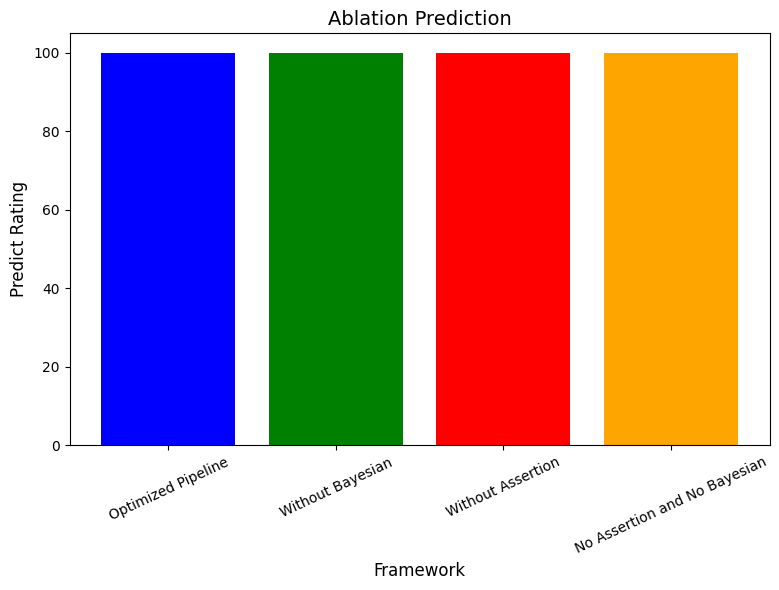

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from dspy.teleprompt import BayesianSignatureOptimizer
from dspy.evaluate.evaluate import Evaluate


sentiments=["Happy",
            "sadness",
            "Angry",
            "Fear",
            "Joy",
            "Surprise",
            ]


def should_be_correct(sen, set):
  check=dspy.Predict("sentence -> sentiment")
  result=check(sentence=f"Is this {set}; a correct sentiment for {sen}. Return 0 for False and 1 for True.")
  if result.sentiment==0:
    return False
  else:
    return True

class Emotion(dspy.Signature):
    """Classify emotion among sadness, joy, love, anger, fear, surprise."""

    sentence = dspy.InputField(desc = "Input sentence")
    sentiment = dspy.OutputField(desc = "Predicted Emotion in word")


class EmotionPipelineAssertions(dspy.Module):
    def __init__(self, assert_on=True):
        super().__init__()
        self.assert_on = assert_on
        self.Emotion_predicted = dspy.ChainOfThought(Emotion)

    def forward(self, sentence, **kwargs):
        predicted_Sentiment = self.Emotion_predicted(sentence=sentence)

        if self.assert_on:
            dspy.Suggest(
                should_be_correct(sentence, predicted_Sentiment),
                "Emotion is correct.",
                target_module=Emotion
            )

        return predicted_Sentiment


class Assess(dspy.Signature):
    """Assess the quality of the solution along the specified dimension."""

    assessed_text = dspy.InputField()
    assessment_sentence = dspy.InputField()
    assessment_sentiment = dspy.OutputField(desc="Only True or False")


def metric(gold, pred, trace=None):
    sentence, sentiment, emos = gold.sentence, gold.sentiment, pred.sentiment

    correctness = f"The given emos{emos} will be effective for this sentence {sentence}. The gold sentiment is {sentiment}"
    informative = f"For this sentence {sentence} is the given {emos} informative. The gold sentiment is {sentiment}"

    correct = dspy.ChainOfThought(Assess)(assessed_text=sentence, assessment_sentence=correctness)
    informative = dspy.ChainOfThought(Assess)(assessed_text=sentence, assessment_sentence=informative)

    correctness_score = correct.assessment_sentiment
    info_score = informative.assessment_sentiment
    score = 0

    if correctness_score == "True":
        score += 1

    if info_score == "True":
        score += 1

    return score / 2.0



# Define your devset and kwargs here
# Replace placeholders with your actual development dataset and any additional keyword arguments you need for evaluation

kwargs = dict(display_progress=True, display_table=5)

# Set up the `evaluate_on_hotpotqa` function. We'll use this many times below.
evaluate_on_hotpotqa = Evaluate( devset = devset, num_threads=1, display_progress=True, display_table=5)

# Define function to evaluate pipeline
def evaluate_pipeline(assertion=True, bayesian=True):
    Emotion_predicted = EmotionPipelineAssertions()

    # Compile the pipeline with specified configurations
    if assertion and bayesian:
        compiled_pipeline = BayesianSignatureOptimizer(metric=metric, n=5, init_temperature=1.0).compile(Emotion_predicted, devset=devset, optuna_trials_num=5, max_bootstrapped_demos=3, max_labeled_demos=5, eval_kwargs=kwargs)
        config_label = "Optimized Pipeline"
    elif assertion and not bayesian:
        compiled_pipeline = Emotion_predicted
        config_label = "Without Bayesian"
    elif not assertion and bayesian:
        without_assertion=EmotionPipelineAssertions(assert_on=False)
        compiled_pipeline = BayesianSignatureOptimizer(metric=metric, n=5, init_temperature=1.0).compile(without_assertion, devset=devset, optuna_trials_num=5, max_bootstrapped_demos=3, max_labeled_demos=5, eval_kwargs=kwargs)
        config_label = "Without Assertion"
    else:
        without_assertion_and_bayesian=EmotionPipelineAssertions(assert_on=False)
        compiled_pipeline = without_assertion_and_bayesian
        config_label = "No Assertion and No Bayesian"

    # Evaluate the compiled pipeline
    eval_score = evaluate_on_hotpotqa(compiled_pipeline, metric=metric)
    return eval_score, config_label


# Run the evaluation for each configuration

scores = []
config_labels = []

for assertion in [True, False]:
    for bayesian in [True, False]:
        eval_score, config_label = evaluate_pipeline(assertion=assertion, bayesian=bayesian)
        scores.append(eval_score)
        config_labels.append(config_label)



# Plotting the results
plt.figure(figsize=(8, 6))  # Adjust figure size
bar_colors = ['blue', 'green', 'red', 'orange']

x = np.arange(len(config_labels))
plt.bar(x, scores, color= bar_colors)
plt.xlabel('Framework',  fontsize=12)
plt.ylabel('Predict Rating',  fontsize=12)
plt.title('Ablation Prediction', fontsize=14)
plt.xticks(x, config_labels, rotation=25,  fontsize=10)

plt.tight_layout()
plt.show()
